## Table of Contents
- [Import libraries](#1)
- [processing tables](#2)
- [Download tables](#3)


<a name='1'></a>
## Import libraries

The script is focused on setting up an environment for data analysis and visualization. It imports a suite of libraries and modules that are essential for statistical computing, data manipulation, progress tracking, file system operations, and generating visualizations such as plots and Venn diagrams. The specific libraries imported include pandas for data structures, numpy for numerical operations, tqdm for progress bars, glob for file path retrieval, os for operating system interaction, matplotlib and seaborn for plotting and graphical representations, and matplotlib_venn for creating Venn diagrams.

Additionally, the script modifies the system path to include a custom directory, which suggests that the script will use additional custom modules and configuration settings located in this directory. These custom modules, imported with wildcard imports (from config import * and from functions import *)

In [2]:
# %load /cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/base_imports.py
import pandas as pd
import numpy as np
import tqdm 
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tarfile
import re
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import sys
sys.path.append(r"/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func")
from config import *
from functions import *

<a name='2'></a>
## Download tables

Download tables OHSU, ETH, FILTERING

In [3]:
PATH_ETH=create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_TABLES,ETH_PATH_BRCA])
PATH_OHSU=create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_TABLES,OHSU_PATH_BRCA])
PATH_filter=create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_TABLES,NAME_FILTERING_BRCA])
sample = 'TCGAC8A12P01A11RA11507'
COLUMNS=['kmer',sample]
data = pd.read_csv(PATH_filter, sep=";", low_memory=False)
ETH = pd.read_csv(PATH_ETH, sep="\t", low_memory=False)
OHSU = pd.read_csv(PATH_OHSU, sep="\t", low_memory=False)

FileNotFoundError: [Errno 2] No such file or directory: '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/202301_myurchikova_MT/DATA/BRCA/TABLES/out_df_filtering_BRCA.csv'

Rename & processing tables

In [5]:
OHSU.rename(columns = {'in-frame_neoepitopes': 'kmer'}, inplace = True)
OHSU = table_processing.change_column_names(OHSU)
OHSU = table_processing.preprocess_ohsu(OHSU)
ETH.rename(columns = ETH_COLMNS, inplace = True)
data.drop(columns=data.columns[0])

NameError: name 'OHSU' is not defined

Find `inter % total`

In [8]:
data = data.loc[(data['sample']==sample)]
inter=np.array(data['size_intersection'])
s_ETH=np.array(data['size_eth\ohsu'])
s_OHSU=np.array(data['size_ohsu\eth'])

snum = inter+s_ETH+s_OHSU
ninter = inter/snum*100.

data.insert(loc=4,column='inter % total',value=ninter)

,Unnamed: 0,sample,filter_foreground,filter_background,inter % total,filter,size_ohsu,size_eth,size_intersection,size_ohsu\eth,size_eth\ohsu,eth_kmers\inter,ohsu_kmers\inter,inter_kmers
0,0,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across1,FiltNormalsGtexCohortCohortlim3.0Across10,19.854015,SampleLim0.0CohortLim2.0Across1 FiltNormalsGte...,445,376,136,309,240,"['VPKLQPLLP', 'YQSFSLFCL', 'PLNRVLFCR', 'WKTIH...","['QELRRSWPR', 'THIPGCYVT', 'ITIYSWSLS', 'SPDGR...","['PLLYKTEFC', 'ERGAAGSCW', 'AAKPNEEIS', 'LYKTE..."
1,1,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across1,FiltNormalsGtexCohortCohortlim1.0Across2,12.053571,SampleLim0.0CohortLim2.0Across1 FiltNormalsGte...,157,94,27,130,67,"['RKQSPVLSP', 'NGRIVRAVP', 'WKTIHRKQS', 'MNGRI...","['NTQVKQHPF', 'ATTAGTGRR', 'GAGVRAQRP', 'QELRR...","['AAKPNEEIS', 'ERGAAGSCW', 'GSSSKGRGS', 'GRGSR..."
2,2,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across1,FiltNormalsGtexCohortCohortlim0.0Across1,12.107623,SampleLim0.0CohortLim2.0Across1 FiltNormalsGte...,157,93,27,130,66,"['RKQSPVLSP', 'NGRIVRAVP', 'WKTIHRKQS', 'MNGRI...","['NTQVKQHPF', 'ATTAGTGRR', 'GAGVRAQRP', 'QELRR...","['AAKPNEEIS', 'ERGAAGSCW', 'GSSSKGRGS', 'GRGSR..."
3,3,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across5,FiltNormalsGtexCohortCohortlim3.0Across10,32.846715,SampleLim0.0CohortLim2.0Across5 FiltNormalsGte...,77,105,45,32,60,"['RKQSPVLSP', 'RWKTIHRKF', 'WKTIHRKQS', 'LVLPV...","['SSDLHHQQN', 'GANRRTGRQ', 'SDLHHQQND', 'ANRRT...","['AAKPNEEIS', 'AGGLHGEFG', 'PVGAAGGLH', 'AKVTS..."
4,4,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across1,FiltNormalsGtexCohortCohortlim3.0Across2,15.844156,SampleLim0.0CohortLim2.0Across1 FiltNormalsGte...,253,193,61,192,132,"['RWKTIHRKF', 'WKTIHRKQS', 'MNGRIVRAV', 'VQLGP...","['CIRNWSLSL', 'NTQVKQHPF', 'ATTAGTGRR', 'GTKGE...","['AAKPNEEIS', 'ERGAAGSCW', 'GSSSKGRGS', 'GRGSR..."
5,5,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across5,FiltNormalsGtexCohortCohortlim3.0Across2,34.831461,SampleLim0.0CohortLim2.0Across5 FiltNormalsGte...,43,77,31,12,46,"['RKQSPVLSP', 'RWKTIHRKF', 'WKTIHRKQS', 'QVENN...","['GSTSSDLHH', 'SSDLHHQQN', 'TGSTSSDLH', 'DTGST...","['AAKPNEEIS', 'AKVTSSRIH', 'LVYAAKPNE', 'KQFIE..."
6,6,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across1,FiltNormalsGtexCohortCohortlim3.0AcrossAny,22.208738,SampleLim0.0CohortLim2.0Across1 FiltNormalsGte...,553,454,183,370,271,"['VPKLQPLLP', 'APLVSVGNF', 'YQSFSLFCL', 'PLNRV...","['QELRRSWPR', 'THIPGCYVT', 'ITIYSWSLS', 'SPDGR...","['PLLYKTEFC', 'ERGAAGSCW', 'AAKPNEEIS', 'LYKTE..."
7,7,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across5,FiltNormalsGtexCohortCohortlim3.0AcrossAny,36.419753,SampleLim0.0CohortLim2.0Across5 FiltNormalsGte...,102,119,59,43,60,"['RKQSPVLSP', 'RWKTIHRKF', 'WKTIHRKQS', 'LVLPV...","['SSDLHHQQN', 'GANRRTGRQ', 'NTLPTKDGH', 'SDLHH...","['AAKPNEEIS', 'AGGLHGEFG', 'PVGAAGGLH', 'AKVTS..."
8,8,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across5,FiltNormalsGtexCohortCohortlim1.0AcrossAny,20.000000,SampleLim0.0CohortLim2.0Across5 FiltNormalsGte...,20,28,8,12,20,"['RKQSPVLSP', 'WKTIHRKQS', 'QVENNSSKT', 'ENNSS...","['GSTSSDLHH', 'SSDLHHQQN', 'TGSTSSDLH', 'DTGST...","['AAKPNEEIS', 'GALVYAAKP', 'AGALVYAAK', 'LVYAA..."
9,9,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across5,FiltNormalsGtexCohortCohortlim1.0Across10,20.000000,SampleLim0.0CohortLim2.0Across5 FiltNormalsGte...,20,28,8,12,20,"['RKQSPVLSP', 'WKTIHRKQS', 'QVENNSSKT', 'ENNSS...","['GSTSSDLHH', 'SSDLHHQQN', 'TGSTSSDLH', 'DTGST...","['AAKPNEEIS', 'GALVYAAKP', 'AGALVYAAK', 'LVYAA..."


Define function detect_sample

In [9]:
def detect_sample(data,sample,percent):
    out = data.loc[(data['sample']==sample)&(data['inter % total']==percent)]
    i=1
    while True:
        if out.empty:
            out = data.loc[(data['sample']==sample)&(data['inter % total']>percent-0.1*i)&(data['inter % total']<percent+0.1*i)]
        else:
            break
        i+=1
    
    out = out.sample()
    return out

detect_sample(data,sample,30)

,Unnamed: 0,sample,filter_foreground,filter_background,inter % total,filter,size_ohsu,size_eth,size_intersection,size_ohsu\eth,size_eth\ohsu,eth_kmers\inter,ohsu_kmers\inter,inter_kmers
3,3,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across5,FiltNormalsGtexCohortCohortlim3.0Across10,32.846715,SampleLim0.0CohortLim2.0Across5 FiltNormalsGte...,77,105,45,32,60,"['RKQSPVLSP', 'RWKTIHRKF', 'WKTIHRKQS', 'LVLPV...","['SSDLHHQQN', 'GANRRTGRQ', 'SDLHHQQND', 'ANRRT...","['AAKPNEEIS', 'AGGLHGEFG', 'PVGAAGGLH', 'AKVTS..."


Use function detect_sample for find names

In [10]:
fil_con_A=detect_sample(data,sample,30)
fil_con_B=detect_sample(data,sample,20)
fil_con_C=detect_sample(data,sample,12)
name_A=fil_con_A['filter']
name_B=fil_con_B['filter']
name_C=fil_con_C['filter']

,Unnamed: 0,sample,filter_foreground,filter_background,inter % total,filter,size_ohsu,size_eth,size_intersection,size_ohsu\eth,size_eth\ohsu,eth_kmers\inter,ohsu_kmers\inter,inter_kmers
3,3,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across5,FiltNormalsGtexCohortCohortlim3.0Across10,32.846715,SampleLim0.0CohortLim2.0Across5 FiltNormalsGte...,77,105,45,32,60,"['RKQSPVLSP', 'RWKTIHRKF', 'WKTIHRKQS', 'LVLPV...","['SSDLHHQQN', 'GANRRTGRQ', 'SDLHHQQND', 'ANRRT...","['AAKPNEEIS', 'AGGLHGEFG', 'PVGAAGGLH', 'AKVTS..."


Find Fil_Cons

In [13]:
fil_con_A=set(fil_con_A['inter_kmers'])
fil_con_B=set(fil_con_B['inter_kmers'])
fil_con_C=set(fil_con_C['inter_kmers'])

# a.Isolate the kmers sequences for test1= A.difference(B) and test2= B.difference(C).

find diggerent with A&B and B&C

In [14]:
test1 = fil_con_A.difference(fil_con_B)
test2 = fil_con_B.difference(fil_con_C)

transpose str-type to list-type

In [16]:
l_test1=list(test1)
t1 = l_test1[0][1:][::-1][1:][::-1].split("', '")
t1[0]=t1[0].replace("'","")
t1[-1]=t1[0-1].replace("'","")


# Additional algoritm

['AAKPNEEIS',
 'AGGLHGEFG',
 'PVGAAGGLH',
 'AKVTSSRIH',
 'LVYAAKPNE',
 'AAGGLHGEF',
 'KQFIENSNC',
 'IPYTIKSKA',
 'GKQFIENSN',
 'TRRQREQGA',
 'KVTSSRIHS',
 'VGAAGGLHG',
 'ENSNCQLGT',
 'FIENSNCQL',
 'REQGAFPTT',
 'GALVYAAKP',
 'AGALVYAAK',
 'IKSKAVRGE',
 'RQREQGAFP',
 'SKAVRGEQG',
 'TIKSKAVRG',
 'VAGALVYAA',
 'GGKQFIENS',
 'SSRIHSGEK',
 'TAKVTSSRI',
 'IENSNCQLG',
 'VITRRQREQ',
 'KSKAVRGEQ',
 'ITRRQREQG',
 'RIHSGEKYL',
 'SRIHSGEKY',
 'KAVRGEQGT',
 'VYAAKPNEE',
 'PYTIKSKAV',
 'ALVYAAKPN',
 'GPVGAAGGL',
 'YTIKSKAVR',
 'QREQGAFPT',
 'NSNCQLGTV',
 'TSSRIHSGE',
 'GAAGGLHGE',
 'QFIENSNCQ',
 'RRQREQGAF',
 'VTSSRIHSG',
 'YAAKPNEEI']

# b.Then go back to the OHSU and ETH generation tables, select rows with the kmers test1.

Location data to `TCGA`

In [18]:
kmers_interest=t1
b_eth = ETH.set_index('kmer')
b_eth1 = b_eth.loc[kmers_interest , [col for col in ETH.columns if 'TCGA' in col]]


,TCGAC8A12P01A11RA11507,TCGAAOA0JM01A21RA05607,TCGABHA18V01A11RA12D07,TCGAA2A0D201A21RA03407,TCGAA2A0SX01A12RA08407
kmer,,,,,
AAKPNEEIS,4.383962,0.0,0.0,0.0,0.0
AGGLHGEFG,1.461321,0.0,0.0,0.0,0.0
PVGAAGGLH,1.461321,0.0,0.0,0.0,0.0
AKVTSSRIH,4.383962,0.0,0.0,0.0,0.0
LVYAAKPNE,4.383962,0.0,0.0,0.0,0.0
AAGGLHGEF,1.461321,0.0,0.0,0.0,0.0
KQFIENSNC,86.217919,0.0,0.0,0.0,0.0
IPYTIKSKA,1.461321,0.0,0.0,0.0,0.0
GKQFIENSN,86.217919,0.0,0.0,0.0,0.0


Location data to `TCGA`

In [19]:
kmers_interest=t1
b_ohsu = OHSU.set_index('kmer')
b_ohsu1 = b_ohsu.loc[kmers_interest , [col for col in OHSU.columns if 'TCGA' in col]]


,TCGA24143101A01R156613,TCGA24229801A01R156913,TCGA25131301A01R156513,TCGA25131901A01R156513,TCGA61200801A02R156813,TCGAA2A0D201A21RA03407,TCGAA2A0SX01A12RA08407,TCGAAOA0JM01A21RA05607,TCGABHA18V01A11RA12D07,TCGAC8A12P01A11RA11507,all_TCGA_over0,all_TCGA_over1,all_TCGA_over3
kmer,,,,,,,,,,,,,
AAKPNEEIS,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4.383962,0.0,0.0,0.0
AGGLHGEFG,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.461321,0.0,0.0,0.0
PVGAAGGLH,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.461321,0.0,0.0,0.0
AKVTSSRIH,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4.383962,0.0,0.0,0.0
LVYAAKPNE,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4.383962,0.0,0.0,0.0
AAGGLHGEF,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.461321,0.0,0.0,0.0
KQFIENSNC,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,86.217919,0.0,0.0,0.0
IPYTIKSKA,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.461321,0.0,0.0,0.0
GKQFIENSN,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,86.217919,0.0,0.0,0.0


# c.Extract the expression in the sample. Plot it across kmers. Extract the number of BRCA samples with expression >=2 reads. Plot it across kmers.


Extract number of BRCA samples with expresssion >=2

<Figure size 2160x648 with 0 Axes>

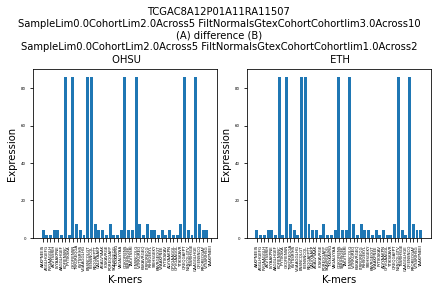

In [43]:
matplotlib.rcParams.update({'font.size':4})
x1 = b_ohsu1.index
y1 = b_ohsu1[sample]
x2 = b_eth1.index
y2 = b_eth1[sample]

plt.figure(figsize=(30, 9))

fig,ax = plt.subplots(nrows=1,ncols=2)
ax1=ax[0]
ax2=ax[1]



ax1.bar(x1,y1)
ax2.bar(x2,y2)

plt.suptitle(sample+'\n'+name_A.values[0]+'\n'+'(A) difference (B)'+'\n'+name_B.values[0], size = 10)

ax1.set_xticks([pos for pos in range(len(x1))])
ax1.set_xticklabels(x1,rotation=90,ha='center')
ax1.set_xlabel('K-mers', size = 10)
ax1.set_ylabel('Expression', size = 10)
ax1.set_title(' OHSU', size = 10)

ax2.set_xticks([pos for pos in range(len(x2))])
ax2.set_xticklabels(x2,rotation=90,ha='center')
ax2.set_xlabel('K-mers', size = 10)
ax2.set_ylabel('Expression', size = 10)
ax2.set_title(' ETH', size = 10)

# Save plot
    
plt.tight_layout()
path_sample =create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_SAMPLES,sample,NAME_PLOT_LOI_C1])
plt.savefig(path_sample, dpi=300)
plt.savefig('picture.png', dpi=300)
plt.show()

Verify data.sum

In [45]:
interm_eth = b_eth1 >=2
interm_eth_s=interm_eth.sum(axis = 1)
interm_eth_s

kmer
AAKPNEEIS    1
AGGLHGEFG    0
PVGAAGGLH    0
AKVTSSRIH    1
LVYAAKPNE    1
AAGGLHGEF    0
KQFIENSNC    1
IPYTIKSKA    0
GKQFIENSN    1
TRRQREQGA    1
KVTSSRIHS    1
VGAAGGLHG    0
ENSNCQLGT    1
FIENSNCQL    1
REQGAFPTT    1
GALVYAAKP    1
AGALVYAAK    1
IKSKAVRGE    0
RQREQGAFP    1
SKAVRGEQG    0
TIKSKAVRG    0
VAGALVYAA    1
GGKQFIENS    1
SSRIHSGEK    1
TAKVTSSRI    1
IENSNCQLG    1
VITRRQREQ    1
KSKAVRGEQ    0
ITRRQREQG    1
RIHSGEKYL    1
SRIHSGEKY    1
KAVRGEQGT    0
VYAAKPNEE    1
PYTIKSKAV    0
ALVYAAKPN    1
GPVGAAGGL    0
YTIKSKAVR    0
QREQGAFPT    1
NSNCQLGTV    1
TSSRIHSGE    1
GAAGGLHGE    0
QFIENSNCQ    1
RRQREQGAF    1
VTSSRIHSG    1
YAAKPNEEI    1
dtype: int64

Verify data.sum

In [47]:
interm_ohsu = b_ohsu1 >=2
interm_ohsu_s=interm_ohsu.sum(axis = 1)

kmer
AAKPNEEIS    1
AGGLHGEFG    0
PVGAAGGLH    0
AKVTSSRIH    1
LVYAAKPNE    1
AAGGLHGEF    0
KQFIENSNC    1
IPYTIKSKA    0
GKQFIENSN    1
TRRQREQGA    1
KVTSSRIHS    1
VGAAGGLHG    0
ENSNCQLGT    1
FIENSNCQL    1
REQGAFPTT    1
GALVYAAKP    1
AGALVYAAK    1
IKSKAVRGE    0
RQREQGAFP    1
SKAVRGEQG    0
TIKSKAVRG    0
VAGALVYAA    1
GGKQFIENS    1
SSRIHSGEK    1
TAKVTSSRI    1
IENSNCQLG    1
VITRRQREQ    1
KSKAVRGEQ    0
ITRRQREQG    1
RIHSGEKYL    1
SRIHSGEKY    1
KAVRGEQGT    0
VYAAKPNEE    1
PYTIKSKAV    0
ALVYAAKPN    1
GPVGAAGGL    0
GPVGAAGGL    0
YTIKSKAVR    0
QREQGAFPT    1
NSNCQLGTV    1
TSSRIHSGE    1
GAAGGLHGE    0
QFIENSNCQ    1
RRQREQGAF    1
VTSSRIHSG    1
YAAKPNEEI    1
dtype: int64

diff = 0
This initializes a variable diff that will be used to count the number of differences between two datasets.
for eth, ohsu in zip(interm_eth_s, interm_ohsu_s):
A for loop is used to iterate over two datasets (interm_eth_s and interm_ohsu_s) simultaneously. The zip() function pairs the two lists so that corresponding elements from both can be accessed at the same time.
if interm_eth_s[eth] != interm_ohsu_s[ohsu]:
Inside the loop, there is a check to see if the current element from the first list is not equal to the corresponding element from the second list, then...
diff += 1
...the diff variable is incremented by 1, indicating a detected difference between the elements.
print(interm_eth_s[eth], interm_ohsu_s[ohsu])
When a difference is detected, the differing elements' values from both lists are printed.
print(diff)
After completing the loop, the total number of differences found is printed.
print(diff/interm_eth_s.shape[0]*100)
In the last line of code, the percentage of differing elements relative to the total number of elements in the list interm_eth_s is calculated. This uses the property shape[0], which provides the number of rows in an array or DataFrame (if interm_eth_s is such).

In [49]:
diff = 0
for eth,ohsu in zip(interm_eth_s,interm_ohsu_s):
        if interm_eth_s[eth]!=interm_ohsu_s[ohsu]:
            diff +=1
            print(interm_eth_s[eth],interm_ohsu_s[ohsu])
print(diff)
print(diff/interm_eth_s.shape[0]*100)

0 1
1 0
0 1
3
6.666666666666667


Sets the font size for all plots in the Matplotlib session.
Defines coordinates for the bars of the two plots: x1, y1 for the first and x2, y2 for the second.
Creates a figure object with dimensions of 16x9 inches.
Creates a grid of two subplots.
Creates two bar plots using the data x1, y1 and x2, y2.
Sets a common title for both plots.
Configures the ticks and labels for each of the plots, including rotating the x-axis labels by 90 degrees for better readability.
Saves the plot to a file using a path formed through the create_path function.
Applies tight_layout() to ensure all plot elements are displayed correctly without overlap.
Displays the plot in an interactive environment using plt.show().

<Figure size 1152x648 with 0 Axes>

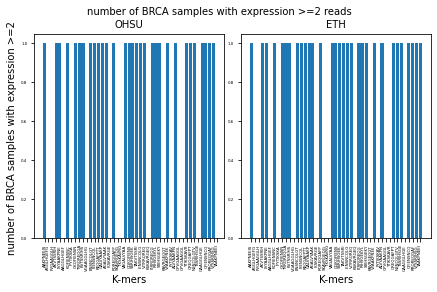

In [52]:
matplotlib.rcParams.update({'font.size':4})
x1=interm_ohsu_s.index
y1=interm_ohsu_s
x2=interm_eth_s.index
y2=interm_eth_s
plt.figure(figsize=(16, 9))

fig,ax = plt.subplots(nrows=1,ncols=2)
ax1=ax[0]
ax2=ax[1]
    
ax1.bar(x1,y1)
ax2.bar(x2,y2)

plt.suptitle('number of BRCA samples with expression >=2 reads', size = 10)

ax1.set_xticks([pos for pos in range(len(x1))])
ax1.set_xticklabels(x1,rotation=90,ha='center')
ax1.set_xlabel('K-mers', size = 10)
ax1.set_ylabel('number of BRCA samples with expression >=2 ', size = 10)
ax1.set_title('OHSU', size = 10)

ax2.set_xticks([pos for pos in range(len(x2))])
ax2.set_xticklabels(x2,rotation=90,ha='center')
ax2.set_xlabel('K-mers', size = 10)
ax2.set_title('ETH', size = 10)

    
# Save plot
    
plt.tight_layout()
path_sample =create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_SAMPLES,sample,NAME_PLOT_LOI_C1])
plt.savefig(path_sample, dpi=300)
plt.savefig('picture.png', dpi=300)
plt.show()

# d.Extract the column for GTEX>0, GTEX>=1,  GTEX>=3. Plot it across kmers.


Data Preparation:
Variables D and GTEX are created by filtering datasets based on certain conditions, possibly related to gene expression levels.
The variable snum calculates a sum, likely for normalization purposes.
Data Normalization:
nGTEX and nD are normalized versions of the GTEX and D datasets, suggesting a transformation to make the data comparable or for scaling purposes.
Bar Chart Preparation:
A dictionary axis is set up, containing labels and their respective normalized data values for the bar chart.
Indices for the main and secondary datasets are extracted and stored in lg and K_main.
Plot Initialization:
A figure and subplot are initialized with specified dimensions to host the bar charts.
An array bottom is initialized to track the base level for stacked bars.
Stacked Bar Plot Construction:
A loop constructs stacked bars by iterating through the axis dictionary, plotting the data and stacking subsequent bars on top of the previous ones.
Annotations are added to the bars, likely representing the data values or percentages for clarity.
Plot Customization:
The plot is fine-tuned with specified bar width, x-tick positions, labels, rotation for readability, y-axis label, and title. This customization enhances the visualization's interpretability.
Finalization and Output:
The tight_layout() method is called to adjust the spacing and prevent label overlap.
The plot is saved to a file using a generated path, with high resolution (DPI setting).
Finally, the plot is displayed on the screen with plt.show().

In [ ]:
    D = b_eth[['gtexCohortfilter >0.0','gtexCohortfilter >=1.0','gtexCohortfilter >=3.0']]
    GTEX0=np.array(D['gtexCohortfilter >0.0'])
    GTEX1=np.array(D['gtexCohortfilter >=1.0'])
    GTEX3=np.array(D['gtexCohortfilter >=3.0'])
    snum = GTEX0+GTEX1+GTEX3
        

    
    # Normalization data            
    nGTEX0 = GTEX0/snum*100.
    nGTEX1 = GTEX1/snum*100.
    nGTEX3 = GTEX3/snum*100.

    axis = {
            'size_eth % total':nGTEX0,
            'size_intersection % total':nGTEX1,
            'size_ohsu % total':nGTEX3
            }
    
    
    lg = len(D.index)
    
    x_main = D.index
    plt.figure(figsize=(16, 9))

    fig,ax = plt.subplots()
    bottom =np.zeros(lg)

    # stack bars
    for data, data_count in axis.items():
            p = ax.bar(D.index,data_count,label=data,bottom=bottom)
            bottom+=data_count

    # add text annotation corresponding to the percentage of each data.
    for xpos, ypos, yval in zip(fffb, nGTEX1/2, nGTEX1):
        plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center",size=3)
    for xpos, ypos, yval in zip(fffb, nGTEX1+nGTEX0/2, nGTEX0):
        plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center",size=3)
    for xpos, ypos, yval in zip(fffb, nGTEX1+nGTEX0+nGTEX3/2, nGTEX03):
        plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center",size=3)
    # add text annotation corresponding to the "total" value of each bar
    for xpos, ypos, yval in zip(fffb, nGTEX1+nGTEX0+nGTEX3, snum):
        plt.text(xpos, ypos, "N=%d"%yval, ha="center", va="bottom",size=3)

    plt.ylim(0,110)
    bar_width=0.4
    bar_position_nGTEX1=range(len(nGTEX1))
    ax.set_xticks([pos for pos in bar_position_nGTEX1])
    ax.set_xticklabels(D.index,rotation=90,ha='center')
    ax.set_xlabel('K-mers')
    ax.set_ylabel('Count')
    ax.set_title(sample)
    
    plt.legend(bbox_to_anchor=(1.01,0.5), loc='center left')
    

    plt.tight_layout()
    plt.savefig(create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_SAMPLES,sample,NAME_PLOT_GTEX]), bbox_inches='tight', pad_inches=0.02, dpi=300)
    plt.show()
    plt.close()

# e.Then do exactly the same plots for test2.

_test2=list(test2):
This line appears to convert a variable test2 into a list, which is then stored in the variable _test2. This is typically done to ensure that the variable is a list type, allowing for list operations that follow.
t2 = _test2[0][1:][::-1][1:][::-1].split(" ", ""):
This line is somewhat complex and seems to attempt multiple operations in sequence:
_test2[0][1:]: Selects the first item from _test2 and slices it from the second character to the end.
[::-1]: Reverses the string.
[1:][::-1]: Slices the reversed string from the second character to the end and reverses it back.
.split(" ", ""): This part of the code is likely an error because the split method does not take a second argument. If the intent was to split the string by spaces, it should be .split(" ").
t2[0]=t2[0].replace("'", ""):
This line replaces all apostrophes in the first element of the list t2 with nothing, effectively removing them.
t2[-1]=t2[0-1].replace("'", ""):
This line intends to replace all apostrophes in the last element of the list t2 with nothing, removing them. However, there's likely an error here as t2[0-1] would be interpreted as t2[-1], so it should just be t2[-1].

In [ ]:
l_test2=list(test2)
t2 = l_test2[0][1:][::-1][1:][::-1].split("', '")
t2[0]=t2[0].replace("'","")
t2[-1]=t2[0-1].replace("'","")

kmers_interest=t2:
This assigns the value of the variable t2 to another variable called kmers_interest. The naming suggests that t2 contains k-mers, which are subsequences of nucleotides, that are of interest for the analysis.
b_eth2 = b_eth.loc[kmers_interest, [col for col in ETH.columns if 'TCGA' in col]]:
This line filters a DataFrame b_eth to create a new DataFrame b_eth2.
.loc[]: The loc method is used to access a group of rows and columns by labels or a boolean array.
kmers_interest: This is used as the row indexer to select rows that are of interest, which presumably correspond to k-mers specified in t2.
[col for col in ETH.columns if 'TCGA' in col]: This list comprehension selects column names from another DataFrame ETH that contain the string 'TCGA'. 'TCGA' likely refers to The Cancer Genome Atlas, indicating that the columns of interest contain genomic data related to TCGA.
The result is that b_eth2 contains a subset of b_eth with rows specified by kmers_interest and columns related to TCGA data from ETH.

In [ ]:
kmers_interest=t2
b_eth2 = b_eth.loc[kmers_interest , [col for col in ETH.columns if 'TCGA' in col]]

kmers_interest=t2:
This assigns the value of the variable t2 to another variable called kmers_interest. The naming suggests that t2 contains k-mers, which are subsequences of nucleotides, that are of interest for the analysis.
b_eth2 = b_eth.loc[kmers_interest, [col for col in OHSU.columns if 'TCGA' in col]]:
This line filters a DataFrame b_ohsu to create a new DataFrame b_ohsu2.
.loc[]: The loc method is used to access a group of rows and columns by labels or a boolean array.
kmers_interest: This is used as the row indexer to select rows that are of interest, which presumably correspond to k-mers specified in t2.
[col for col in OHSU.columns if 'TCGA' in col]: This list comprehension selects column names from another DataFrame OHSU that contain the string 'TCGA'. 'TCGA' likely refers to The Cancer Genome Atlas, indicating that the columns of interest contain genomic data related to TCGA.
The result is that b_ohsu2 contains a subset of b_ohsu with rows specified by kmers_interest and columns related to TCGA data from OHSU.

In [ ]:
kmers_interest=t2
b_ohsu2 = b_ohsu.loc[kmers_interest , [col for col in OHSU.columns if 'TCGA' in col]]

Data Preparation:
x1 and y1 variables are assigned index and sample data from b_ohsu2, likely a DataFrame.
x2 and y2 are assigned similarly from b_eth2.
Figure Setup:
plt.figure(figsize=(30, 9)): A figure is created with a specified size of 30 by 9 inches.
fig_ax and ax1, ax2 are set up to create two subplots within this figure.
Bar Plot Generation:
ax1.bar(x1, y1) and ax2.bar(x2, y2): Two bar plots are generated on the respective axes using the x and y data.
Plot Customization:
The x-ticks are set and labeled with a 90-degree rotation for better readability.
x-labels and y-labels are set for both subplots, describing the data as 'K-mers' and 'Expression'.
Titles are given to both subplots as 'OHSU' and 'ETH', which might denote different datasets or categories.
Subplot Adjustment:
plt.tight_layout(): Adjusts the spacing between the subplots to prevent any overlap of elements.
Saving the Plot:
A path is generated for saving the plot, and then the plot is saved as both a CSV and a PNG file with a high resolution of 300 DPI.
Displaying the Plot:
plt.show(): Displays the plot in an interactive window or inline if run in a Jupyter notebook or similar environment.

In [ ]:
x1 = b_ohsu2.index
y1 = b_ohsu2[sample]
x2 = b_eth2.index
y2 = b_eth2[sample]

plt.figure(figsize=(30, 9))

fig,ax = plt.subplots(nrows=1,ncols=2)
ax1=ax[0]
ax2=ax[1]



ax1.bar(x1,y1)
ax2.bar(x2,y2)

plt.suptitle(sample)

ax1.set_xticks([pos for pos in range(len(x1))])
ax1.set_xticklabels(x1,rotation=90,ha='center')
ax1.set_xlabel('K-mers')
ax1.set_ylabel('Expression')
ax1.set_title(' OHSU')

ax2.set_xticks([pos for pos in range(len(x2))])
ax2.set_xticklabels(x2,rotation=90,ha='center')
ax2.set_xlabel('K-mers')
ax2.set_ylabel('Expression')
ax2.set_title(' ETH')

# Save plot
    
plt.tight_layout()
path_sample =create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_SAMPLES,sample,NAME_PLOT_LOI_C1])
plt.savefig(path_sample, dpi=300)
plt.savefig('picture.png', dpi=300)
plt.show()

interm_eth2 = b_eth2 >>= 2:
This line seems to be applying a bitwise right shift operation to each element in the b_eth2 data structure by 2 bits. The result is stored in a new variable interm_eth2. However, this operation is not typical for pandas DataFrames and might be an error unless the DataFrame contains data types that support bitwise operations, such as integers.
interm_eth_s2=interm_eth2.sum(axis = 1):
This line calculates the sum along axis 1 (typically across columns) of the interm_eth2 data structure and stores the result in interm_eth_s2. This is a common operation when one wants to aggregate data by rows in a pandas DataFrame.

In [ ]:
interm_eth2 = b_eth2 >=2
interm_eth_s2=interm_eth2.sum(axis = 1)

interm_ohsu2 = b_ohsu2 >=2
This line seems to be applying a bitwise right shift operation to each element in the b_ohsu2 data structure by 2 bits. The result is stored in a new variable interm_ohsu2. However, this operation is not typical for pandas DataFrames and might be an error unless the DataFrame contains data types that support bitwise operations, such as integers.
interm_ohsu_s2=interm_ohsu2.sum(axis = 1)
This line calculates the sum along axis 1 (typically across columns) of the interm_ohsu2 data structure and stores the result in interm_ohsu_s2. This is a common operation when one wants to aggregate data by rows in a pandas DataFrame.

In [ ]:
interm_ohsu2 = b_ohsu2 >=2
interm_ohsu_s2=interm_ohsu2.sum(axis = 1)

Data Assignment:
Variables x1, y1, x2, and y2 are assigned data likely from pandas DataFrames or Series. These variables are intended to be used as the axes in the bar plots. x1 and x2 get their values from the index of two different data sets, while y1 and y2 are assigned the sum of values within each dataset, which suggests that the data might be related to some form of count or measurement.
Figure and Plot Configuration:
The plt.figure() function initializes a new figure with a specified size.
plt.subplots() is used to create a 1x2 grid of subplots (two plots side by side).
Plotting Data:
Two bar charts are generated using ax1.bar(x1, y1) and ax2.bar(x2, y2). Both plots use the same y data (y1), which could be an oversight or intentional depending on the context.
Customizing the Plots:
The main title of the figure is set with plt.suptitle().
For both subplots, the x-ticks and labels are set with a 90-degree rotation for readability. The labels 'K-mers' and 'Expression' suggest that the data might be related to genomic sequences and their expression levels.
Each subplot is given a title ('OHSU' and 'ETH'), which may refer to different data subsets or categories.
Saving and Displaying the Plot:
plt.tight_layout() is called to ensure the layout is organized without any overlapping elements.
The plot is saved to a directory with a specified path and filename, and it's also saved as an image file ('picture.png') with a high resolution (300 DPI).
Finally, plt.show() is called to display the plot, which would bring up a window with the figure if the script is run interactively.

In [ ]:
x1=interm_ohsu_s2.index
y=interm_ohsu_s2
x2=interm_eth_s2.index
y2=interm_eth_s2
plt.figure(figsize=(16, 9))

fig,ax = plt.subplots(nrows=1,ncols=2)
ax1=ax[0]
ax2=ax[1]
    
ax1.bar(x1,y1)
ax2.bar(x1,y1)

plt.suptitle('number of BRCA samples with expression >=2 reads')

ax1.set_xticks([pos for pos in range(len(x1))])
ax1.set_xticklabels(x1,rotation=90,ha='center')
ax1.set_xlabel('K-mers')
ax1.set_ylabel('number of BRCA samples with expression >=2 ')

ax2.set_xticks([pos for pos in range(len(x2))])
ax2.set_xticklabels(x2,rotation=90,ha='center')
ax2.set_xlabel('K-mers')

    
# Save plot
    
plt.tight_layout()
path_sample =create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_SAMPLES,sample,NAME_PLOT_LOI_C1])
plt.savefig(path_sample, dpi=300)
plt.savefig('picture.png', dpi=300)
plt.show()

Data Filtering:
Variables are created by applying filters to some sort of dataset, which could be genomic data. This is indicated by the variables' naming convention (like GTEX) and the use of filtering conditions (e.g., 'gtexChorFilter >0.1').
Data Normalization:
The data is then normalized, a common practice in data analysis to make datasets comparable. This is done by dividing the data by the sum of certain elements, scaled by 100.
Bar Chart Data Preparation:
A dictionary named axis is prepared, mapping descriptive labels to normalized data, which will be used to label the bar chart.
Plotting Setup:
A figure is set up for plotting, and subplots are defined for displaying multiple charts.
Stacked Bar Chart Construction:
The code constructs a stacked bar chart by iterating over the data, stacking each bar on top of the previous one, and labeling each section.
Annotation and Customization:
Text annotations are added to the bars to display data percentages, enhancing the interpretability of the chart.
The plot is customized with titles, labels, and tick marks, including rotating the x-tick labels for better readability.
Saving and Displaying:
The layout is adjusted, and the plot is saved to a specified path with high resolution.
Finally, the plot is displayed using plt.show(), which would render the figure in an interactive window or inline in a Jupyter notebook.

In [ ]:
    D = b_eth[['gtexCohortfilter >0.0','gtexCohortfilter >=1.0','gtexCohortfilter >=3.0']]
    GTEX0=np.array(D['gtexCohortfilter >0.0'])
    GTEX1=np.array(D['gtexCohortfilter >=1.0'])
    GTEX3=np.array(D['gtexCohortfilter >=3.0'])
    snum = GTEX0+GTEX1+GTEX3
        

    
    # Normalization data            
    nGTEX0 = GTEX0/snum*100.
    nGTEX1 = GTEX1/snum*100.
    nGTEX3 = GTEX3/snum*100.

    axis = {
            'size_eth % total':nGTEX0,
            'size_intersection % total':nGTEX1,
            'size_ohsu % total':nGTEX3
            }
    
    
    lg = len(D.index)
    
    x_main = D.index
    plt.figure(figsize=(16, 9))

    fig,ax = plt.subplots()
    bottom =np.zeros(lg)

    # stack bars
    for data, data_count in axis.items():
            p = ax.bar(D.index,data_count,label=data,bottom=bottom)
            bottom+=data_count

    # add text annotation corresponding to the percentage of each data.
    for xpos, ypos, yval in zip(fffb, nGTEX1/2, nGTEX1):
        plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center",size=3)
    for xpos, ypos, yval in zip(fffb, nGTEX1+nGTEX0/2, nGTEX0):
        plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center",size=3)
    for xpos, ypos, yval in zip(fffb, nGTEX1+nGTEX0+nGTEX3/2, nGTEX03):
        plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center",size=3)
    # add text annotation corresponding to the "total" value of each bar
    for xpos, ypos, yval in zip(fffb, nGTEX1+nGTEX0+nGTEX3, snum):
        plt.text(xpos, ypos, "N=%d"%yval, ha="center", va="bottom",size=3)

    plt.ylim(0,110)
    bar_width=0.4
    bar_position_nGTEX1=range(len(nGTEX1))
    ax.set_xticks([pos for pos in bar_position_nGTEX1])
    ax.set_xticklabels(D.index,rotation=90,ha='center')
    ax.set_xlabel('K-mers')
    ax.set_ylabel('Count')
    ax.set_title(sample)
    
    plt.legend(bbox_to_anchor=(1.01,0.5), loc='center left')
    

    plt.tight_layout()
    plt.savefig(create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_SAMPLES,sample,NAME_PLOT_GTEX]), bbox_inches='tight', pad_inches=0.02, dpi=300)
    plt.show()
    plt.close()